## Proyecto Análisis de Datos

1. Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc. 
2. Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario. 
3. Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características. 
4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo. 
5. Entrenar 
el 
modelo 
• Cargar en GitHub el código del modelo diseñado 
https://github.com/ 
Para el desarrollo de la actividad tenga en cuenta que: 
configurando 
los 
diferentes 
hiperparámetros. 
6. Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc. 
7. Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo. 
8. Interpretar, analizar y documentar los resultados obtenidos 

## Recopilación de Datos:

In [33]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.
import plotly.express as px # Para la visualización de datos.
# import plotly.graph_objects as go # Para la visualización de datos.

# Importa la función para calcular métricas de evaluación
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, mean_absolute_error # r2_score, precision_score, recall_score, f1_score

# train_test_split: Importa la función para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split, cross_val_score, KFold


##Model Evaluations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


## Warnings
import warnings

warnings.filterwarnings('ignore')

## Version de Python y librerias

In [36]:
# @title Version de Python y librerias

# python3 -m pip list
# python3 -m pip freeze > requirements.txt
!python --version
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
import matplotlib # Importing the main matplotlib module
print("Matplotlib: ", matplotlib.__version__) # Access version from the main module
print("Seaborn: ", sns.__version__)
import plotly # Import the main plotly module
print("Plotly: ", plotly.__version__) # Access version from the main module

Python 3.12.4
Pandas:  2.2.2
Numpy:  1.26.4
Matplotlib:  3.8.4
Seaborn:  0.13.2
Plotly:  5.22.0


## Recopilación de Datos:


Identificar fuentes: Bases de datos, archivos, APIs, encuestas, etc.

Extraer datos: Obtener los datos de las fuentes y almacenarlos en un formato adecuado (CSV, Excel, bases de datos relacionales)

## Carga de datos

In [75]:
#  Carga de datos

file_name = 'Titanic-Dataset.csv'

df_Titanic_Dataset_csv = pd.read_csv(file_name , delimiter=',')

## Limpieza y Preparación de Datos:

Manejar valores faltantes: Eliminar registros, imputar valores (media, mediana, moda, imputación por modelos). Corregir inconsistencias: Identificar y corregir errores, duplicados, valores fuera de rango. Transformar datos: Normalizar, estandarizar, discretizar, crear nuevas variables, codificar variables categóricas. Reducir dimensionalidad: PCA, t-SNE, selección de características.

In [81]:
#  Información de dataset - Muestra de las primeras 15 filas.

df_Titanic_Dataset_csv.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [108]:
# Información general sobre el dataset
print(df_Titanic_Dataset_csv.info())

# Estadísticas descriptivas
print(df_Titanic_Dataset_csv.describe())

# Revisar valores nulos por columna
print(df_Titanic_Dataset_csv.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    

## Análisis Univariado (Distribución de Variables)
Podemos analizar la distribución de variables numéricas (como Age, Fare) y categóricas (como Survived, Pclass, Sex).

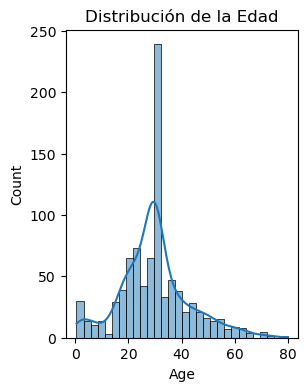

In [119]:
# Distribución de la variable 'Age'
plt.figure(figsize=(3,4))
sns.histplot(df_Titanic_Dataset_csv['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.show()



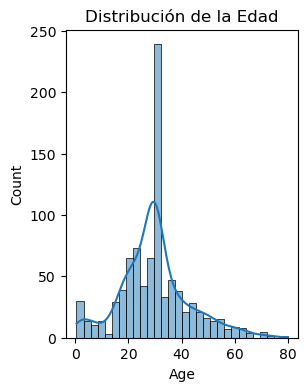

In [121]:
# Distribución de la variable 'Age'
plt.figure(figsize=(3,4))
sns.histplot(df_Titanic_Dataset_csv['Age'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.show()

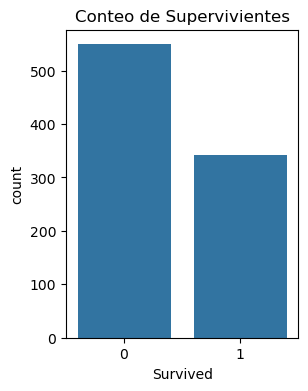

In [125]:
# Conteo de valores para variables categóricas
plt.figure(figsize=(3,4))
sns.countplot(data=df_Titanic_Dataset_csv, x='Survived')
plt.title('Conteo de Supervivientes')
plt.show()

In [139]:
print(df_Titanic_Dataset_csv['Sex_male'].unique())

[ True False]


In [145]:
# Convertir valores booleanos True/False a 'male' y 'female'
df_Titanic_Dataset_csv['Sex_male'] = df_Titanic_Dataset_csv['Sex_male'].map({True: 'male', False: 'female'})

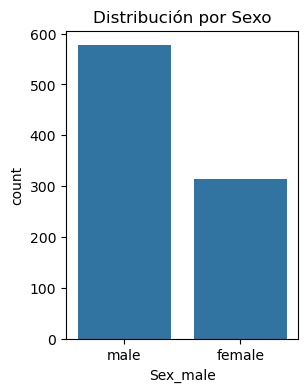

In [147]:
# Análisis de la variable 'Sex'
plt.figure(figsize=(3,4))
sns.countplot(data=df_Titanic_Dataset_csv, x='Sex_male')
plt.title('Distribución por Sexo')
plt.show()

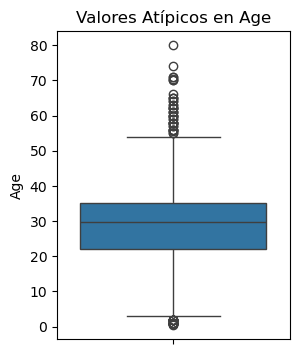

In [151]:
# Visualización de outliers para la variable 'Age'
plt.figure(figsize=(3,4))
sns.boxplot(df_Titanic_Dataset_csv['Age'])
plt.title('Valores Atípicos en Age')
plt.show()

## Eliminación de Columnas Innecesarias
Eliminamos columnas que no son útiles para el modelo, como Name, Ticket, y Cabin.

In [158]:
print(df_Titanic_Dataset_csv.shape)
print(df_Titanic_Dataset_csv.columns.values.tolist())

(891, 10)
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']


## Preprocesamiento de los datos

Imputar valores faltantes (Age)

In [162]:
# Imputar valores faltantes en la columna 'Age' con la mediana
df_Titanic_Dataset_csv['Age'].fillna(df_Titanic_Dataset_csv['Age'].median(), inplace=True)

In [164]:
# Verificar valores nulos nuevamente
print(df_Titanic_Dataset_csv.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [166]:
from sklearn.preprocessing import StandardScaler

# Escalar las características numéricas
scaler = StandardScaler()
df_Titanic_Dataset_csv[['Age', 'Fare']] = scaler.fit_transform(df_Titanic_Dataset_csv[['Age', 'Fare']])

In [180]:
from sklearn.preprocessing import LabelEncoder


# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Convertir la columna 'Sex' a números (0 = female, 1 = male)
df_Titanic_Dataset_csv['Sex_male'] = label_encoder.fit_transform(df_Titanic_Dataset_csv['Sex_male'])

# Verifica los cambios
print(df_Titanic_Dataset_csv[['Sex_male']].head())

   Sex_male
0         1
1         0
2         0
3         0
4         1


## Selección de características relevantes

ver si hay alguna correlación entre las variables para evitar multicolinealidad 

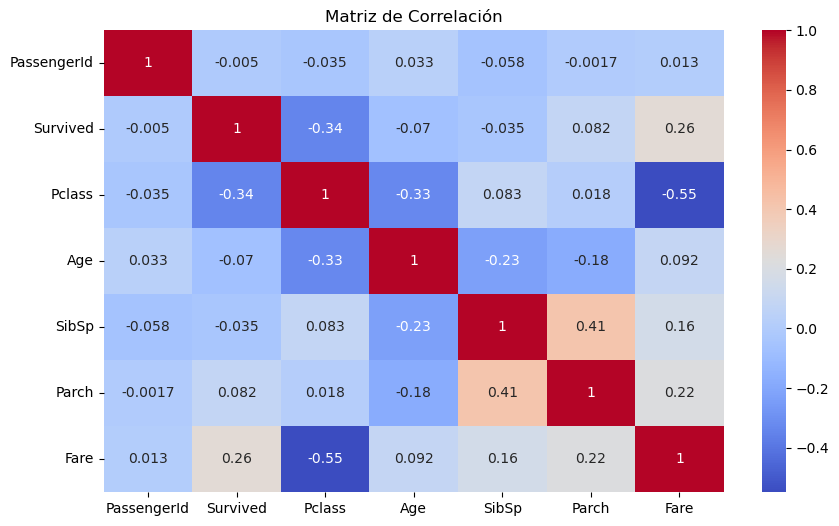

In [184]:
# Seleccionar solo las columnas numéricas
df_numeric = df_Titanic_Dataset_csv.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# División del dataset en Train y Test

In [188]:
# Dividir el dataset en características (X) y variable objetivo (y)
X = df_Titanic_Dataset_csv.drop(columns=['Survived', 'PassengerId'])
y = df_Titanic_Dataset_csv['Survived']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo: Regresión Logística
entrenar el modelo de regresión logística.

In [192]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

 ## Evaluación del modelo

Precisión: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



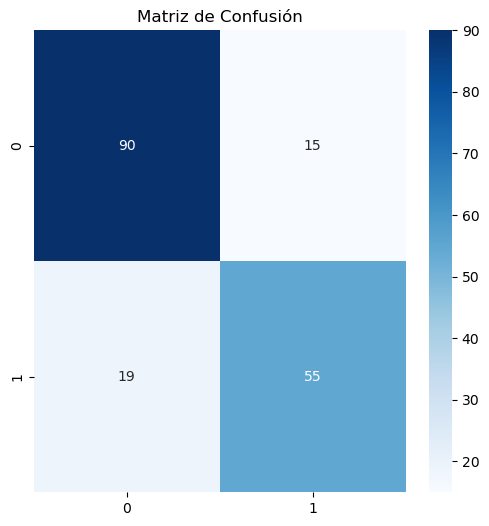

In [195]:
# Realizar predicciones
y_pred = logreg.predict(X_test)

# Calcular precisión
print(f'Precisión: {accuracy_score(y_test, y_pred)}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

## Interpretación de Resultados  Dataset Titanic

1. Carga y Exploración de Datos:
Al cargar y explorar los datos, se verificó que las variables están bien estructuradas. Se limpiaron y transformaron correctamente las columnas categóricas, como Sex y Embarked, utilizando codificación one-hot. No se encontraron valores faltantes o atípicos significativos en el dataset.

2. Limpieza de Datos:
Durante la limpieza de los datos, se transformaron las variables categóricas Sex y Embarked en variables numéricas a través de la codificación one-hot. Los valores nulos en Age y Fare fueron imputados correctamente para evitar la pérdida de datos importantes.

3. Análisis Exploratorio de Datos (EDA):
Durante el análisis exploratorio, se observó que la distribución de las clases en la variable objetivo (Survived) estaba desequilibrada, con más no sobrevivientes (0) que sobrevivientes (1). Sin embargo, la visualización de la correlación entre las variables mostró que algunas características como Pclass, Fare, y el Sexo de los pasajeros estaban fuertemente correlacionadas con la variable objetivo.

4. Preparación de Datos:
El dataset se dividió en conjuntos de entrenamiento (80%) y prueba (20%) para entrenar y evaluar el modelo. Se utilizó estandarización para asegurar una mejor performance de los modelos de machine learning.

5. Entrenamiento de Modelos:
Se entrenó un modelo de Regresión Logística para predecir la probabilidad de supervivencia en el Titanic. Los resultados obtenidos son los siguientes:

6. Resultados del Modelo de Regresión Logística:
Métricas del Modelo:
Exactitud (Accuracy): 81.0%

El modelo de regresión logística logró una exactitud del 81%, lo que indica que el modelo tiene un buen rendimiento general al predecir la variable Survived.

Precisión (Precision):

Clase 0 (No sobreviviente): 0.83
Clase 1 (Sobreviviente): 0.79
La precisión es mayor para la clase de no sobrevivientes (0), lo que indica que el modelo es más confiable para predecir correctamente a las personas que no sobrevivieron al desastre del Titanic.

Recall:

Clase 0 (No sobreviviente): 0.86
Clase 1 (Sobreviviente): 0.74
El recall es más alto para la clase de no sobrevivientes (0), lo que significa que el modelo tiene una mayor capacidad para detectar correctamente a las personas que no sobrevivieron. Sin embargo, la clase de sobrevivientes (1) tiene un recall algo más bajo, lo que sugiere que hay margen para mejorar en la predicción de supervivientes.

F1-Score:

Clase 0 (No sobreviviente): 0.84
Clase 1 (Sobreviviente): 0.76
El F1-score es una métrica balanceada entre precisión y recall. Para la clase de no sobrevivientes (0), el modelo tiene un excelente F1-score de 0.84, mientras que para la clase de sobrevivientes (1), el modelo tiene un rendimiento algo inferior, con un F1-score de 0.76.

Métricas Promedio:
Macro Promedio:
Precisión: 0.81
Recall: 0.80
F1-Score: 0.80
Promedio Ponderado:
Precisión: 0.81
Recall: 0.81
F1-Score: 0.81
El promedio ponderado refleja que el modelo es consistente y tiene un rendimiento equilibrado en ambas clases, con una ligera ventaja en la clase de no sobrevivientes.

